In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [18]:
data=pd.read_csv("ToyotaCorolla - MLR.csv")
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [20]:
data['Fuel_Type'] = data['Fuel_Type'].astype('category')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Price      1436 non-null   int64   
 1   Age_08_04  1436 non-null   int64   
 2   KM         1436 non-null   int64   
 3   Fuel_Type  1436 non-null   category
 4   HP         1436 non-null   int64   
 5   Automatic  1436 non-null   int64   
 6   cc         1436 non-null   int64   
 7   Doors      1436 non-null   int64   
 8   Cylinders  1436 non-null   int64   
 9   Gears      1436 non-null   int64   
 10  Weight     1436 non-null   int64   
dtypes: category(1), int64(10)
memory usage: 113.8 KB


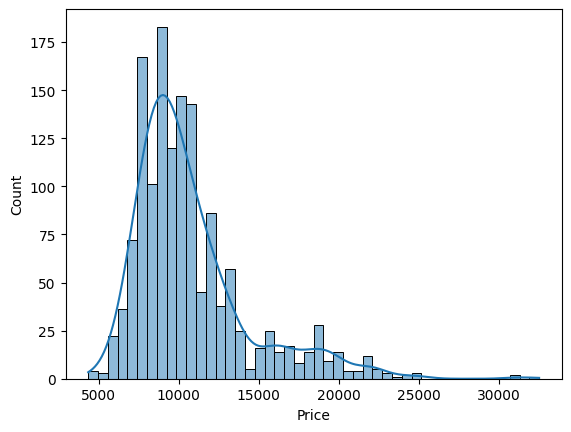

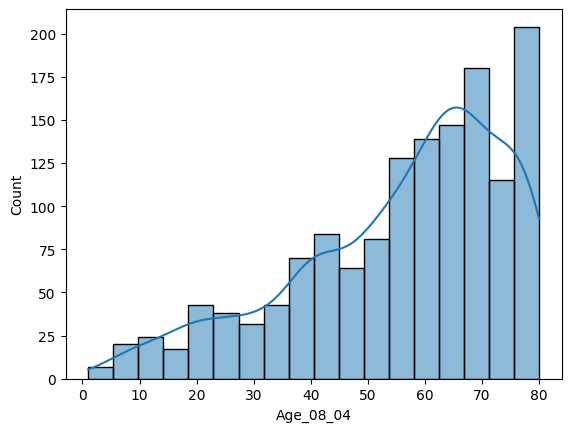

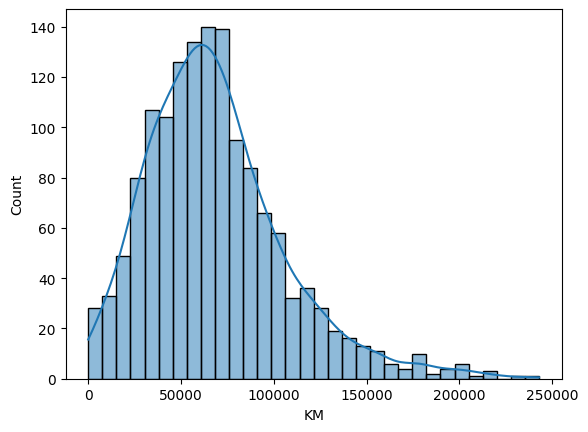

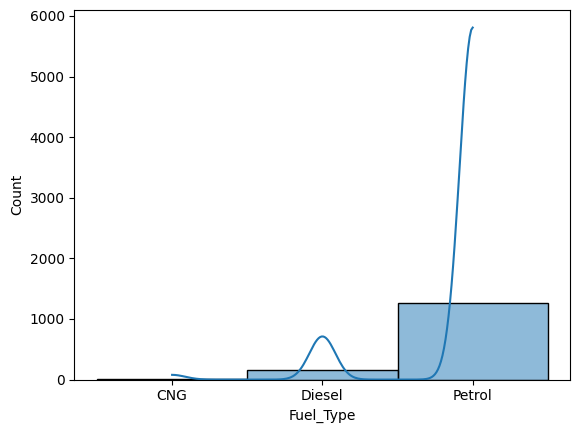

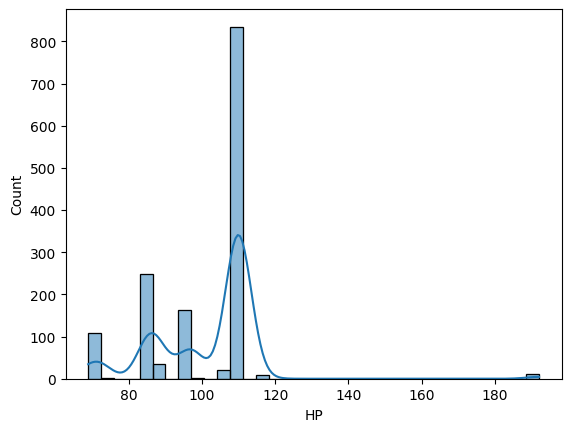

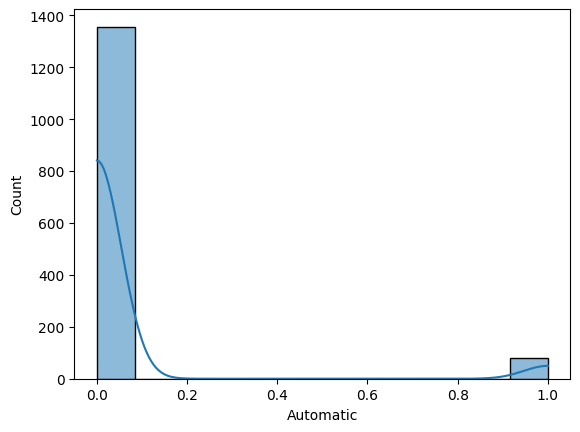

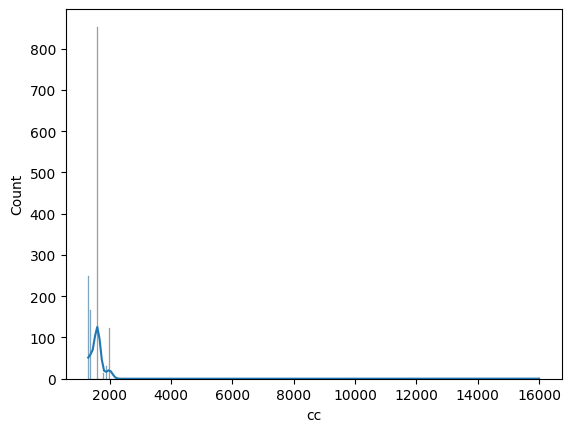

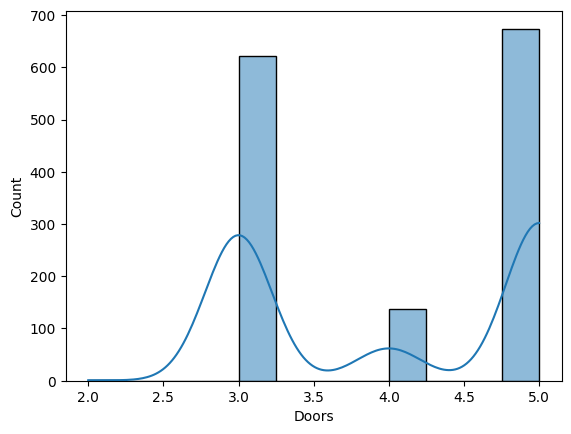

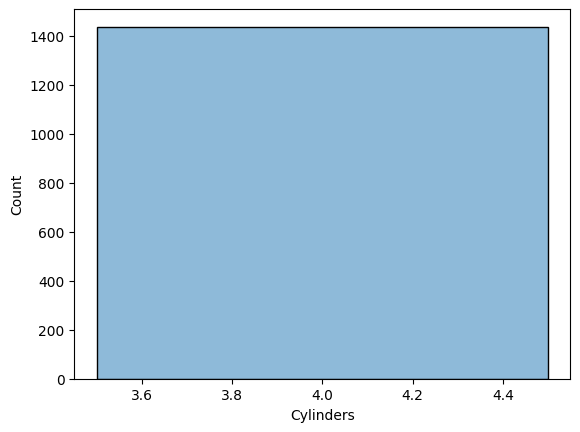

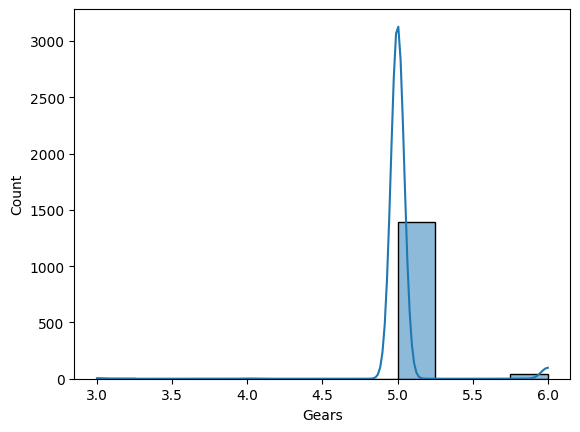

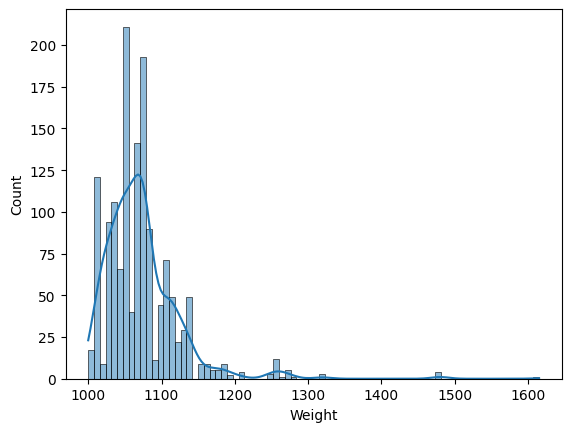

In [22]:
for i,column in enumerate(data.columns):
    sns.histplot(data[column],kde=True)
    plt.show()

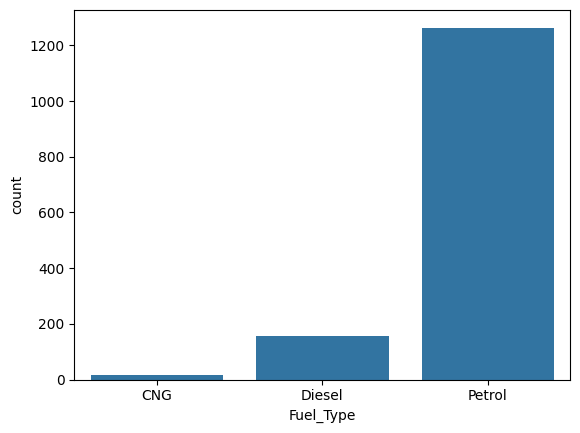

In [23]:
sns.countplot(x='Fuel_Type',data=data)
plt.show()

In [24]:
numeric=data.select_dtypes(include='number')

In [27]:
for i,column in enumerate(numeric.columns,1):
    numeric[f'{column}_z_score']=zscore(numeric[column])
    outliers=numeric[numeric[f'{column}_z_score'].abs()>3]
    print(outliers)

     Price  Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
14   22500         32  34131  192          0  1800      3          4      6   
15   22000         28  18739  192          0  1800      3          4      6   
16   22750         30  34000  192          0  1800      3          4      5   
49   21950         31  64982  192          0  1800      5          4      6   
53   21950         27  49866  192          0  1800      5          4      5   
68   22250         22  30000  110          0  2000      5          4      5   
89   21950         19  50005  110          0  2000      3          4      5   
91   22250         20  37500   90          0  2000      3          4      5   
109  32500          4      1  116          0  2000      5          4      5   
110  31000          4   4000  116          0  2000      5          4      5   
111  31275          4   1500  116          0  2000      5          4      5   
112  24950          8  13253  116          0  2000  

In [26]:
from sklearn.model_selection import train_test_split

In [31]:
x=data.drop(columns=['Price','Fuel_Type'])
y=data['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
y_pred1

array([ 8247.99008613, 17589.91792015,  9352.67988655,  7963.78469841,
       19348.90651133,  6659.56553394,  6018.98685922, 10467.71100148,
        9544.06302278, 12927.35108033,  9472.8025234 ,  8096.71555222,
       10657.05190311, 16826.71072436,  7722.45217098, 13524.85354469,
       12777.85322403,  8382.73293218, 12101.89711944, 18291.16118065,
        7218.15243567, 11884.87434271, 10675.55489134, 12679.49967375,
       14072.25381352, 11003.30731794,  7823.27810009, 12479.11341327,
       11088.66309646,  8187.92069977, 17926.23477674,  9313.86709352,
       11074.81999042,  9420.8557944 , 12198.67432889,  9319.38760877,
        7019.99574276, 11228.91893368, 10819.43750857, 16024.06160613,
       12354.18623636, 25734.66173619,  7921.09594395,  9476.04794685,
        7398.71581754, 14462.80518003, 12897.8716249 , 18461.48832202,
       10770.16297761,  6855.74094194, 10251.07297992,  8507.67921741,
       10683.53081247, 13348.16365458, 17463.9635066 , 11959.96229904,
      

In [41]:
model1.score(x_test,y_test)

0.8093268923618436

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_predict=dt.predict(x_test)
dt_predict

array([ 9950., 16250.,  8500.,  7750., 14950.,  8500.,  7950.,  9950.,
        9950., 11950.,  8490.,  8950., 11950., 17200.,  5751., 12850.,
       13250.,  9250., 12750., 19950.,  7900., 11290.,  9750., 12950.,
       13500.,  9950.,  7750., 13500., 10750.,  8950., 19950., 12250.,
        4750.,  7950.,  9900.,  8950.,  6750.,  9940., 13750., 15750.,
       11500., 31275.,  8800., 10450.,  8750., 14950., 13450., 20750.,
        9950.,  9250., 10950.,  8150.,  9250., 11900., 19900., 12500.,
        9900.,  7000.,  8250., 12250.,  7950., 11480.,  8900.,  8450.,
        8750.,  9750., 11450.,  8750., 18600.,  8250.,  7900.,  7950.,
       13500.,  9950.,  8500.,  9940.,  7950.,  5750., 19600., 12950.,
        7250., 19950.,  6900.,  9950.,  8490.,  8950., 12450.,  7750.,
       15950., 10950.,  8750.,  7500., 16950., 11000.,  8750.,  6950.,
        9450., 16895.,  8950.,  6950., 20750., 19950., 16895.,  6900.,
        5600.,  8950.,  6990., 11500., 17950.,  8950.,  7950., 10950.,
      

In [37]:
dt.score(x_test,y_test)

0.8627483215689514

In [38]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
knr_pred=knr.predict(x_test)
knr_pred

array([11660. , 15400. ,  9430. ,  9129. , 14779. ,  7710. ,  8860. ,
        9690. ,  9932. , 12920. ,  8130. , 10299. , 10234.8, 20053.6,
        7910. , 12869. , 11190. ,  8370. , 12250. , 20113.6,  8040. ,
        8030. , 10560. , 10400. , 11500. , 11370. , 14019. , 11370. ,
       11849. ,  9770. , 13800. , 10010. ,  8010. ,  8090. , 13530. ,
        7860. ,  8210. ,  8930. , 12570. , 11790. ,  7780. , 19030. ,
        9430. , 10308. ,  8239. ,  9870. , 15410. , 15920. , 10210. ,
        8530. ,  8910. , 11960. , 10189. , 10520. , 11480. , 13120. ,
        9670. ,  6610. ,  8070. , 12870. ,  8960. , 10810. , 12240. ,
       16100. ,  8630. , 12099. , 14210. , 10690. ,  9430. ,  9490. ,
        8279. , 10029. , 10360. ,  9630. , 10280. ,  8119. ,  9129. ,
        6650. , 15039. , 13599. ,  8470. , 15240. , 10249. , 10060. ,
        9200. ,  9639. , 10399. ,  9130. , 14930. , 13200. , 10330. ,
        9110. ,  8609.8, 14750. ,  9558. ,  8837. ,  9207. , 17958. ,
        9610. ,  844

In [40]:
knr.score(x_test,y_test)

0.4767892726562334

In [46]:
r2=r2_score(y_test,y_pred1)
mse=mean_squared_error(y_test,y_pred1)
print(r2)
mse

0.8093268923618436


np.float64(3128127.442415375)

In [47]:
r2_knr=r2_score(y_test,knr_pred)
mse2=mean_squared_error(y_test,knr_pred)
print(r2_knr)
mse2

0.4767892726562334


np.float64(8583642.730972223)

In [49]:
r2_dt=r2_score(y_test,dt_predict)
mse3=mean_squared_error(y_test,dt_predict)
print(r2_dt)
mse3

0.8627483215689514


np.float64(2251711.0416666665)

In [66]:
from sklearn.linear_model import Lasso,Ridge


In [65]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)
y_pred2=lasso.predict(x_test)
mse_lasso=np.mean((y_pred2-y_test)**2)
lasso_co=pd.DataFrame()
lasso_co['Columns']=x_train.columns
lasso_co['Coefficient Estimate']=pd.Series(lasso.coef_)
lasso_co

,Columns,Coefficient Estimate
0,Age_08_04,-127.927079
1,KM,-0.015373
2,HP,29.398930
3,Automatic,304.008472
4,cc,-1.156880
5,Doors,-7.651400
6,Cylinders,0.000000
7,Gears,579.986901
8,Weight,18.414468


In [68]:
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)
y_pred3=ridge.predict(x_test)
ridge_co=pd.DataFrame()
ridge_co['Columns']=x_train.columns
ridge_co['coefficient estimate']=pd.Series(ridge.coef_)
ridge_co

,Columns,coefficient estimate
0,Age_08_04,-127.965306
1,KM,-0.015364
2,HP,29.366891
3,Automatic,318.639535
4,cc,-1.154240
5,Doors,-8.012559
6,Cylinders,0.000000
7,Gears,595.228750
8,Weight,18.400459


# Interview Questions

1.What is Normalization & Standardization and how is it helpful?

Normalization and Standardization are techniques used to rescale data, making it easier to compare and analyze.

Normalization Normalization rescales the data to a fixed range, typically [0, 1] or [-1, 1]. This is useful when you want to ensure that all features contribute equally to the analysis, especially when they are measured on different scales.

Formula:
xnew=x−xminxmax−xmin

Example:
If you have a dataset with values ranging from 10 to 100, and you want to normalize it to [0, 1]:

For a value of 20:
xnew=20−10100−10=1090≈0.11

Standardization
Standardization rescales the data to have a mean of 0 and a standard deviation of 1.
This is useful when you want to compare data that follows a normal distribution.

Formula:
xnew=x−μσ where ( \mu ) is the mean and ( \sigma ) is the standard deviation.

2.What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to isolate the effect of each variable.

Techniques to Address Multicollinearity:

Remove Highly Correlated Variables:

Identify and remove one of the correlated variables.

Example: If height and shoe size are highly correlated, you might remove shoe size from the model. Combine Variables:

Combine correlated variables into a single variable. Example: If height and weight are correlated, you could create a new variable like BMI (Body Mass Index).
Principal Component Analysis (PCA):

Transform the correlated variables into a set of linearly uncorrelated variables called principal components. Example: Use PCA to reduce the dimensionality of the dataset while retaining most of the variance.

Regularization Techniques:

Apply techniques like Ridge Regression or Lasso Regression that add a penalty to the regression model to reduce the impact of multicollinearity. Example: Ridge Regression adds a penalty equal to the square of the magnitude of coefficients, which helps in reducing their variance